In [1]:
import numpy as np
#from sklearn.preprocessing import MinMaxScaler

import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix


from sklearn.decomposition import TruncatedSVD, PCA
import matplotlib.pyplot as plt
import seaborn as sns
#import umap 


In [2]:
#Set seed
seed=42

In [3]:
def Visual_comp(data_t,n_var,clusters,tag):
    #Plot first two components of given reduction algorithm and colors points according to given cluster
    col=[]
    for i in range(1,n_var+1):
        name='Component_'+str(i)
        col.append(name)
    pc_df = pd.DataFrame(data =data_t , columns =col ) 
    pc_df['Cluster'] =clusters
    pc_df.head()
    #plot pca
    sns.lmplot( x="Component_1", y="Component_2",
    data=pc_df, 
    palette=sns.color_palette("Paired"),
    fit_reg=False, 
    hue='Cluster', # color by cluster
    legend=True,
    scatter_kws={"s": 80}).set(title='First two components of '+tag)
  
    return pc_df

# Load METABRIC

Load data from metabric:

* Exprexpression dat

* CNV


In [4]:
#Expression
data_exp=pd.read_csv("/CTGlab/data/brca_metabric/data_mrna_illumina_microarray_zscores_ref_diploid_samples.txt",sep='\t')
#CNV
data_cnv=pd.read_csv("/CTGlab/data/brca_metabric/data_cna.txt",sep='\t')

In [5]:
data_exp

,Hugo_Symbol,Entrez_Gene_Id,MB-0362,MB-0346,MB-0386,MB-0574,MB-0185,MB-0503,MB-0641,MB-0201,...,MB-6192,MB-4820,MB-5527,MB-5167,MB-5465,MB-5453,MB-5471,MB-5127,MB-4313,MB-4823
0,RERE,473,-0.7139,1.2266,-0.0053,-0.4399,-0.5958,0.4729,0.4974,-1.1900,...,-0.4596,1.8975,1.1120,1.1942,-1.7974,1.1339,0.0259,-0.3529,-1.2327,1.7217
1,RNF165,494470,-0.4606,0.3564,-0.6800,-1.0563,-0.0377,-0.6829,-0.2854,-0.4336,...,-1.0927,0.9103,-0.0023,-0.2898,3.5763,1.3429,0.5726,0.1731,0.5482,1.2239
2,PHF7,51533,-0.3325,-1.0617,0.2587,-0.2982,-1.2422,0.0558,-0.5011,-0.6418,...,-0.0725,0.7219,0.1402,0.8718,-0.9275,-0.0587,0.5240,-0.0311,4.4925,-0.2173
3,CIDEA,1149,-0.0129,-1.0394,3.2991,-0.2632,-1.0949,1.2628,2.0796,-0.8310,...,0.0679,-0.7126,-0.1523,-0.7593,-0.7141,-0.4324,-0.0336,-0.4003,2.4698,-0.7268
4,TENT2,167153,-0.7853,0.0337,-0.6649,2.1640,-0.2031,1.0304,0.6046,-1.7557,...,0.6400,-0.1102,1.2719,0.8178,-1.0301,0.6082,0.5608,2.4222,-3.2853,0.4181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20598,VPS72,6944,-0.2908,0.3443,0.4818,0.2503,-0.1057,-0.1657,-0.4730,1.4719,...,-0.9195,-1.4857,-1.4543,0.3791,-0.3989,-1.5529,-0.6349,-0.8160,-1.0902,-0.2811
20599,CSMD3,114788,-0.5286,-0.4379,6.9258,1.0466,-0.1060,0.3284,0.0993,-0.1987,...,-0.3776,-0.6366,-0.0607,-0.0475,0.2231,0.0706,0.1188,-0.3231,-0.1251,-0.4265
20600,CC2D1A,54862,0.0068,-0.7520,0.0519,0.2502,-0.3376,-0.4705,-0.6036,-1.1946,...,-0.5877,-1.1169,-0.5420,0.2947,-0.2800,2.5337,-0.8272,-0.1200,4.2708,-1.0090
20601,IGSF9,57549,0.4053,1.2968,0.7962,-0.1634,-0.2418,-0.2545,-0.9814,1.9240,...,-0.6217,-1.5481,-1.2088,0.4594,0.3821,0.3254,0.8187,-0.5648,0.5931,0.9043


Load meta data (Clinical data)

In [6]:
data_clin=pd.read_csv("/CTGlab/data/brca_metabric/data_clinical_sample.txt",sep='\t',skiprows=4)

In [7]:
data_clin.set_index('SAMPLE_ID',inplace=True)

In [8]:
data_clin

,PATIENT_ID,CANCER_TYPE,CANCER_TYPE_DETAILED,ER_STATUS,HER2_STATUS,GRADE,ONCOTREE_CODE,PR_STATUS,SAMPLE_TYPE,TUMOR_SIZE,TUMOR_STAGE,TMB_NONSYNONYMOUS
SAMPLE_ID,,,,,,,,,,,,
MB-0000,MB-0000,Breast Cancer,Breast Invasive Ductal Carcinoma,Positive,Negative,3.0,IDC,Negative,Primary,22.0,2.0,0.000000
MB-0002,MB-0002,Breast Cancer,Breast Invasive Ductal Carcinoma,Positive,Negative,3.0,IDC,Positive,Primary,10.0,1.0,2.615035
MB-0005,MB-0005,Breast Cancer,Breast Invasive Ductal Carcinoma,Positive,Negative,2.0,IDC,Positive,Primary,15.0,2.0,2.615035
MB-0006,MB-0006,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Positive,Negative,2.0,MDLC,Positive,Primary,25.0,2.0,1.307518
MB-0008,MB-0008,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Positive,Negative,3.0,MDLC,Positive,Primary,40.0,2.0,2.615035
...,...,...,...,...,...,...,...,...,...,...,...,...
MTS-T2428,MTS-T2428,Breast Cancer,Invasive Breast Carcinoma,Positive,NaN,1.0,BRCA,NaN,Primary,27.0,1.0,2.615035
MTS-T2429,MTS-T2429,Breast Cancer,Invasive Breast Carcinoma,Positive,NaN,2.0,BRCA,NaN,Primary,28.0,2.0,5.230071
MTS-T2430,MTS-T2430,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,BRCA,NaN,Primary,NaN,0.0,7.845106


In [9]:
#bind index colums
data_exp['hugo_entrez_combo']=data_exp.Hugo_Symbol+'_'+data_exp.Entrez_Gene_Id.astype(str)
data_cnv['hugo_entrez_combo']=data_cnv.Hugo_Symbol+'_'+data_cnv.Entrez_Gene_Id.astype(str)
data_exp.drop(['Hugo_Symbol','Entrez_Gene_Id'],axis=1,inplace=True)
data_cnv.drop(['Hugo_Symbol','Entrez_Gene_Id'],axis=1,inplace=True)

Select samples presentin both datasets

In [10]:
samples=list(set(data_exp.columns) & set(data_cnv.columns))
data_exp_sub=data_exp[samples]
data_cnv_sub=data_cnv[samples]
samples.remove('hugo_entrez_combo')

In [11]:
data_clin=data_clin[data_clin.index.isin(samples)]


In [12]:
print('RNA data dim:',data_exp_sub.shape)
print('CNA data dim:',data_cnv_sub.shape)

RNA data dim: (20603, 1981)
CNA data dim: (22544, 1981)


In [13]:
gene_com_id=list(set(data_exp_sub.hugo_entrez_combo) & set(data_cnv_sub.hugo_entrez_combo))
print('common features: ',len(gene_com_id))

common features:  0


In [14]:
data_exp_sub.drop('hugo_entrez_combo',axis=1).describe()

,MB-5576,MB-6085,MB-4749,MB-7138,MB-6200,MB-0225,MB-4881,MB-6146,MB-0305,MB-4416,...,MB-4254,MB-4855,MB-0453,MB-3271,MB-0311,MB-7174,MB-4894,MB-5154,MB-0435,MB-3165
count,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000,...,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000
mean,0.028137,0.040642,-0.005084,-0.009363,-0.045827,0.061291,-0.000852,-0.038197,-0.019075,0.081776,...,0.034567,0.016710,0.007802,0.029046,-0.019890,-0.001061,0.022220,-0.038281,0.024135,0.026971
std,1.000627,1.145414,0.808963,1.095095,0.894425,1.228287,1.043218,0.917689,0.815378,1.381429,...,1.095062,1.025678,0.917207,1.099589,0.880257,0.987685,0.974888,0.839414,1.185409,1.140247
min,-4.219800,-5.291100,-3.590200,-4.325500,-4.324700,-4.775100,-4.454400,-4.775100,-3.903200,-4.472000,...,-4.714200,-4.389700,-4.183300,-3.999600,-3.723700,-3.521800,-4.322900,-3.276200,-4.337800,-5.918800
25%,-0.622900,-0.689450,-0.553100,-0.715300,-0.620200,-0.731750,-0.683900,-0.634300,-0.536600,-0.835450,...,-0.704550,-0.679350,-0.581600,-0.726650,-0.605200,-0.672250,-0.613900,-0.595000,-0.750450,-0.727250
50%,-0.047200,-0.095900,-0.048600,-0.101900,-0.093600,-0.078300,-0.098300,-0.102500,-0.060800,-0.023000,...,-0.056500,-0.092600,-0.074900,-0.065800,-0.061000,-0.062500,-0.058700,-0.086100,-0.123800,-0.076900
75%,0.612550,0.604300,0.503000,0.591650,0.484400,0.715750,0.580400,0.488350,0.466900,0.955000,...,0.675150,0.612600,0.524000,0.693700,0.512150,0.624150,0.587800,0.488750,0.654800,0.691150
max,11.138000,11.834800,7.386600,11.976200,12.677200,18.934600,10.506500,12.931400,9.211700,6.254800,...,9.062600,8.785800,11.851500,19.462300,10.493800,8.495600,13.405400,5.883900,11.898000,11.724500


Reset index and replace nan values

In [15]:
#SET hugo+entrez as index
data_exp_sub.set_index('hugo_entrez_combo',inplace=True)
data_cnv_sub.set_index('hugo_entrez_combo',inplace=True)
#drop nan
if data_exp_sub.isnull().values.any():
    data_exp_sub=data_exp_sub.apply(lambda x: x.fillna(x.mean()),axis=0)

if data_cnv_sub.isnull().values.any():
    data_cnv_sub=data_cnv_sub.apply(lambda x: x.fillna(x.mean()),axis=0)

In [16]:
data_exp_sub.isnull().values.any()

False

## CNV Encoding

**TF-IDF**

Try using tf-idf transformation--> Normalization highly used in text document analysis which " weights " terms/features according to occurence-> if a term is less comon is more informative

In [17]:
sign_cnv=np.sign(data_cnv_sub)
abs_cnv=np.abs(sign_cnv)

In [18]:
transformer = TfidfTransformer(smooth_idf=True)
tdfidf_cnv=transformer.fit_transform(np.abs(data_cnv_sub.T))

# Dimensionality reduction

## PCA and SVD

We reduce each dataset separatelly and then take most relevant components from each one.
Take in mind how many qubits you want to use in order to reduce properly the data-set.
Here we want to use 4 qubits and thus use 2 pc for omics.

In [22]:
n_comp=5

In [23]:
#For EXP
pca_exp= PCA(n_components=n_comp,random_state=seed,svd_solver='randomized')
pca_exp.fit(data_exp_sub.T)
X_pca_exp=pca_exp.transform(data_exp_sub.T)
print("X truncated is a sparse matrix with shape: %s" % str(X_pca_exp.shape))

#For CNV
pca_cnv= PCA(n_components=n_comp,random_state=seed,svd_solver='randomized')
pca_cnv.fit(data_cnv_sub.T)
X_pca_cnv=pca_cnv.transform(data_cnv_sub.T)
print("X truncated is a sparse matrix with shape: %s" % str(X_pca_cnv.shape))

#For CNV TF-IDF
svd_cnv=TruncatedSVD(n_components=n_comp,random_state=seed)
svd_cnv.fit(tdfidf_cnv)
X_svd_cnv=svd_cnv.transform(tdfidf_cnv)
print("X truncated is a sparse matrix with shape: %s" % str(X_svd_cnv.shape))

X truncated is a sparse matrix with shape: (1980, 5)
X truncated is a sparse matrix with shape: (1980, 5)
X truncated is a sparse matrix with shape: (1980, 5)


First 2 comp exp: 0.7712995675267578 % variance
3
First 2 comp cna: 0.7792785073500575 % variance
3
First 2 comp cna tdf-idf: 0.7528262817595328 % variance
4


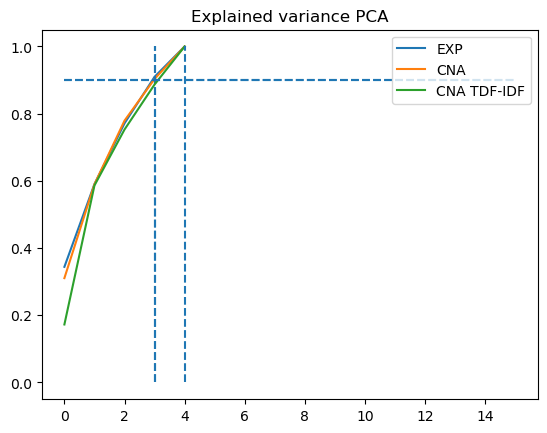

In [28]:
#For EXPR
ev_cumsum = np.cumsum(pca_exp.explained_variance_)/(pca_exp.explained_variance_).sum()
ev_at90 = ev_cumsum[ev_cumsum<0.9].shape[0]
print('First 2 comp exp: {} % variance'.format(ev_cumsum[2]))
print (ev_at90)
plt.title('Explained variance for expr PCA')
plt.plot(ev_cumsum,label='EXP')
plt.vlines(ev_at90, 0, 1, linestyles='dashed')




#For CNA
ev_cumsum= np.cumsum(pca_cnv.explained_variance_)/(pca_cnv.explained_variance_).sum()
ev_at90 = ev_cumsum[ev_cumsum<0.9].shape[0]
print('First 2 comp cna: {} % variance'.format(ev_cumsum[2]))
print (ev_at90)
plt.title('Explained variance PCA')
plt.plot(ev_cumsum,label='CNA')
plt.vlines(ev_at90, 0, 1, linestyles='dashed')
plt.hlines(0.9, 0, 15, linestyles='dashed')
plt.legend()


#For CNA TDF-IDF
ev_cumsum= np.cumsum(svd_cnv.explained_variance_)/(svd_cnv.explained_variance_).sum()
ev_at90 = ev_cumsum[ev_cumsum<0.9].shape[0]
print('First 2 comp cna tdf-idf: {} % variance'.format(ev_cumsum[2]))
print (ev_at90)
plt.title('Explained variance PCA')
plt.plot(ev_cumsum,label='CNA TDF-IDF')
plt.vlines(ev_at90, 0, 1, linestyles='dashed')
plt.hlines(0.9, 0, 15, linestyles='dashed')
plt.legend()


## Visualize compresed data

In [24]:
data_clin

,PATIENT_ID,CANCER_TYPE,CANCER_TYPE_DETAILED,ER_STATUS,HER2_STATUS,GRADE,ONCOTREE_CODE,PR_STATUS,SAMPLE_TYPE,TUMOR_SIZE,TUMOR_STAGE,TMB_NONSYNONYMOUS
SAMPLE_ID,,,,,,,,,,,,
MB-0000,MB-0000,Breast Cancer,Breast Invasive Ductal Carcinoma,Positive,Negative,3.0,IDC,Negative,Primary,22.0,2.0,0.000000
MB-0002,MB-0002,Breast Cancer,Breast Invasive Ductal Carcinoma,Positive,Negative,3.0,IDC,Positive,Primary,10.0,1.0,2.615035
MB-0005,MB-0005,Breast Cancer,Breast Invasive Ductal Carcinoma,Positive,Negative,2.0,IDC,Positive,Primary,15.0,2.0,2.615035
MB-0006,MB-0006,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Positive,Negative,2.0,MDLC,Positive,Primary,25.0,2.0,1.307518
MB-0008,MB-0008,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Positive,Negative,3.0,MDLC,Positive,Primary,40.0,2.0,2.615035
...,...,...,...,...,...,...,...,...,...,...,...,...
MB-7295,MB-7295,Breast Cancer,Breast Invasive Lobular Carcinoma,Positive,Negative,3.0,ILC,Positive,Primary,25.0,NaN,5.230071
MB-7296,MB-7296,Breast Cancer,Breast Invasive Ductal Carcinoma,Positive,Positive,3.0,IDC,Negative,Primary,20.0,NaN,7.845106
MB-7297,MB-7297,Breast Cancer,Breast Invasive Ductal Carcinoma,Positive,Negative,3.0,IDC,Positive,Primary,25.0,NaN,5.230071


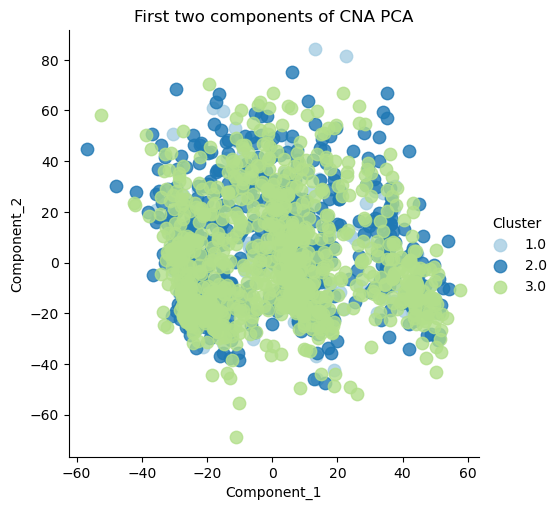

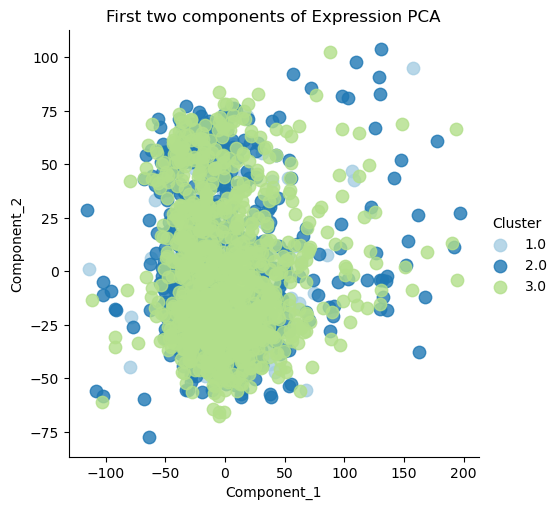

In [30]:
df_pca_cna=Visual_comp(X_pca_cnv,n_comp,list(data_clin.GRADE),tag='CNA PCA')
df_pca_exp=Visual_comp(X_pca_exp,n_comp,list(data_clin.GRADE),tag='Expression PCA')


# Merge Data and save

Merge datasets and Save file


In [31]:
df_pca_cna.set_index(data_cnv_sub.columns,inplace=True)
df_pca_exp.set_index(data_exp_sub.columns,inplace=True)

In [35]:
df_tot=df_pca_exp.drop('Cluster',axis=1).join(df_pca_cna, lsuffix='_exp', rsuffix='_cna')

# IC10

Stratification Integrative Clustering--> 10 classes significant in terms of survival and respons


In [53]:
data_clin_patient=pd.read_csv('/CTGlab/data/brca_metabric/data_clinical_patient.txt',sep='\t',skiprows=4,index_col='PATIENT_ID')


In [54]:
ic10=data_clin_patient['INTCLUST']
ic10.dropna(inplace=True)
ic10.unique()


array(['4ER+', '3', '9', '7', '4ER-', '5', '8', '10', '1', '2', '6'],
      dtype=object)

In [55]:
ic10.replace('4ER+','4',inplace=True)
ic10.replace('4ER-','4',inplace=True)


In [56]:
df_tot_sub=df_tot.join(ic10.astype(int),how='inner')
df_tot_sub.rename(columns={'INTCLUST':'IntClustMemb'},inplace=True)
df_tot_sub.INTCLUST.unique()


AttributeError: 'DataFrame' object has no attribute 'INTCLUST'

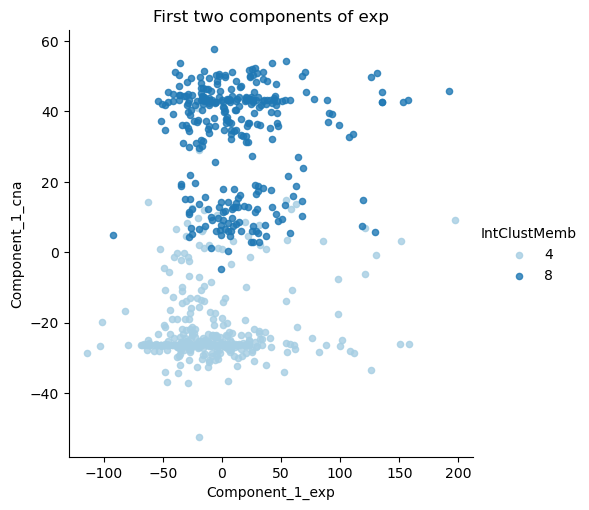

In [58]:
sns.lmplot( x="Component_1_exp", y="Component_1_cna",
    data=df_tot_sub.loc[(df_tot_sub.IntClustMemb == 8) | (df_tot_sub.IntClustMemb == 4)], 
    palette=sns.color_palette("Paired"),
    fit_reg=False, 
    hue='IntClustMemb', # color by cluster
    legend=True,
    scatter_kws={"s": 20}).set(title='First two components of exp')

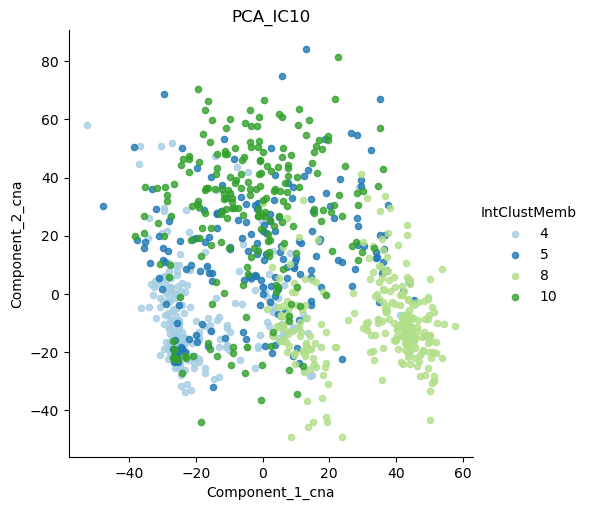

In [59]:
sns.lmplot( x="Component_1_cna", y="Component_2_cna",
    data=df_tot_sub.loc[(df_tot_sub.IntClustMemb == 8) | (df_tot_sub.IntClustMemb == 10)| (df_tot_sub.IntClustMemb == 4)| (df_tot_sub.IntClustMemb == 5)], 
    palette=sns.color_palette("Paired"),
    fit_reg=False, 
    hue='IntClustMemb', # color by cluster
    legend=True,
    scatter_kws={"s": 20}).set(title='PCA_IC10')

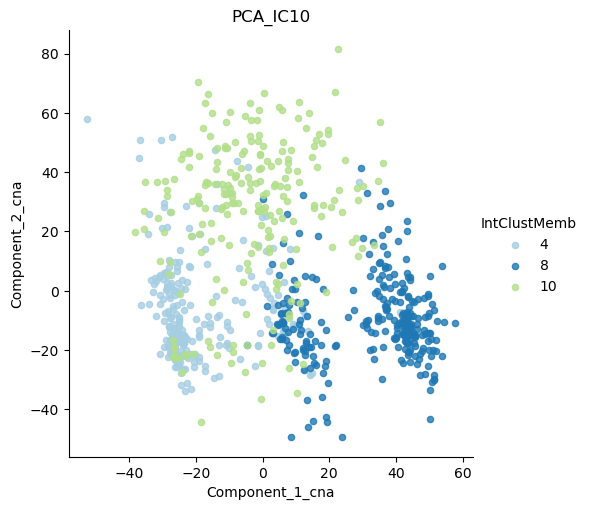

In [60]:
sns.lmplot( x="Component_1_cna", y="Component_2_cna",
    data=df_tot_sub.loc[(df_tot_sub.IntClustMemb == 8) | (df_tot_sub.IntClustMemb == 10)| (df_tot_sub.IntClustMemb == 4)], 
    palette=sns.color_palette("Paired"),
    fit_reg=False, 
    hue='IntClustMemb', # color by cluster
    legend=True,
    scatter_kws={"s": 20}).set(title='PCA_IC10')

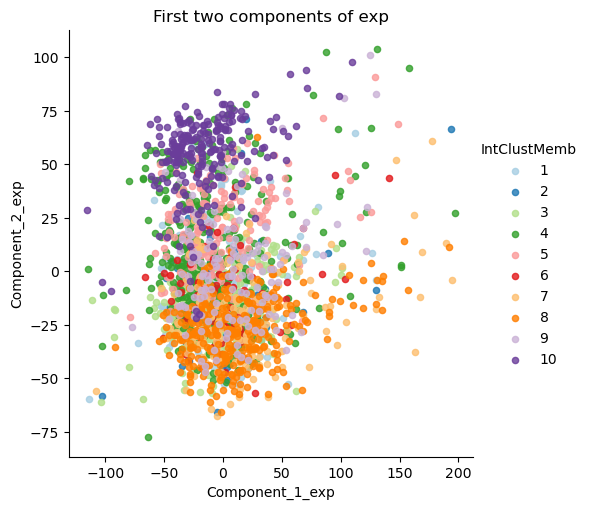

In [62]:
sns.lmplot( x="Component_1_exp", y="Component_2_exp",
    data=df_tot_sub, 
    palette=sns.color_palette("Paired"),
    fit_reg=False, 
    hue='IntClustMemb', # color by cluster
    legend=True,
    scatter_kws={"s": 20}).set(title='First two components of exp')

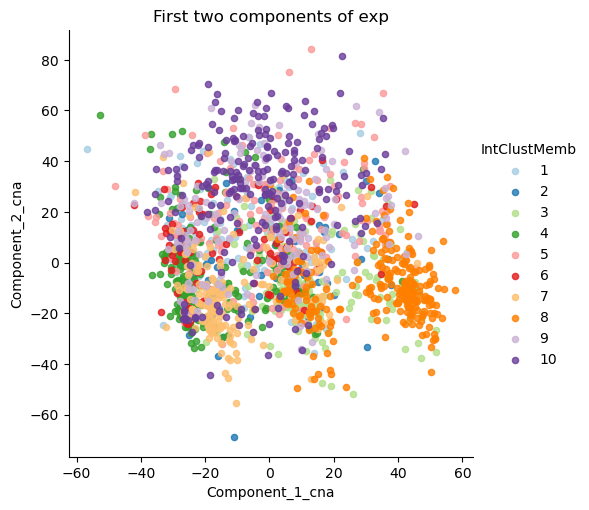

In [63]:
sns.lmplot( x="Component_1_cna", y="Component_2_cna",
    data=df_tot_sub, 
    palette=sns.color_palette("Paired"),
    fit_reg=False, 
    hue='IntClustMemb', # color by cluster
    legend=True,
    scatter_kws={"s": 20}).set(title='First two components of exp')

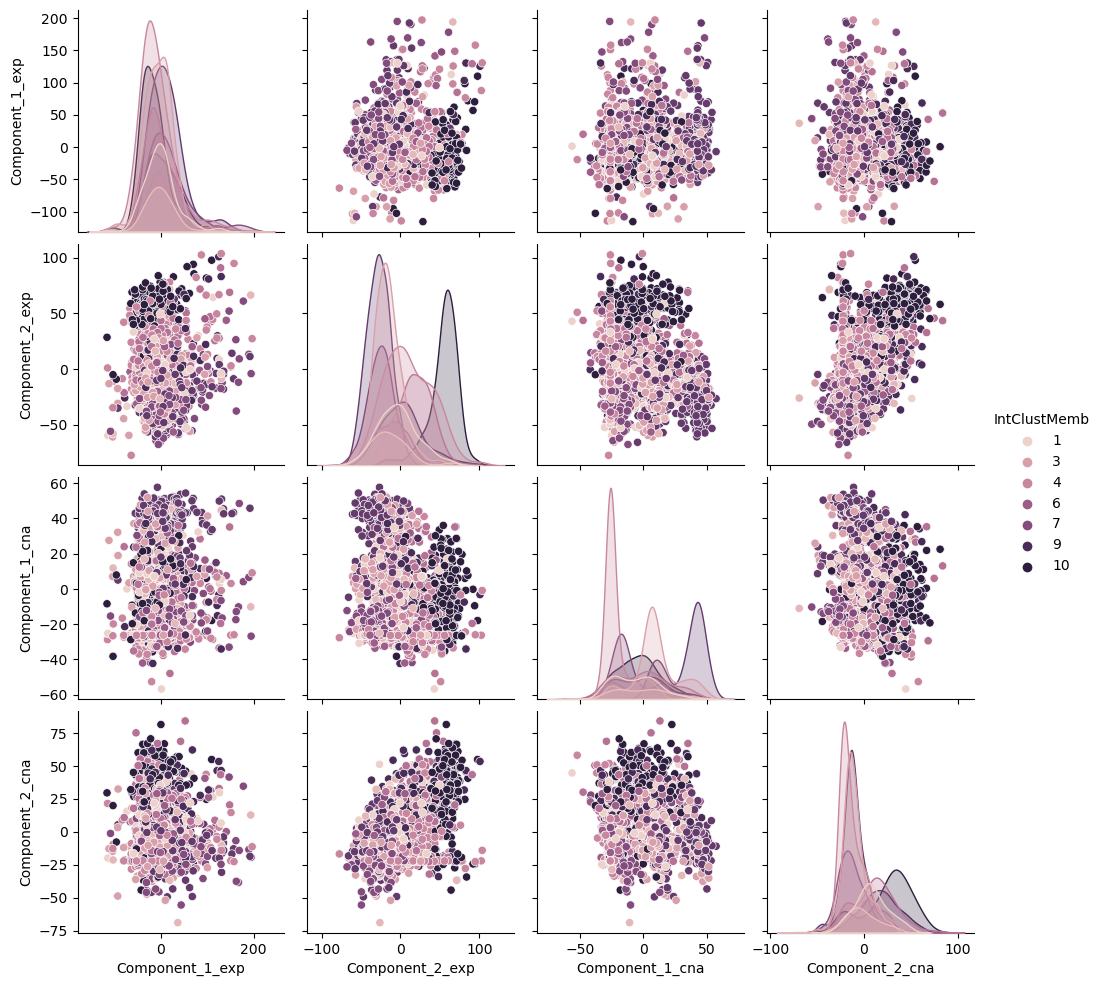

In [64]:
# crea il pairplot
col=['IntClustMemb', 'Component_1_exp', 'Component_2_exp', 'Component_1_cna', 'Component_2_cna']
sns.pairplot(data=df_tot_sub[col], hue='IntClustMemb')
plt.show()

Save model in csv 

In [66]:
#save ic10
df_tot_sub.to_csv('./PCA_METABRIC_10cmp_IC10_full.csv',sep=',')